In [155]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
from langchain_openai import OpenAIEmbeddings
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


load_dotenv()

True

In [24]:
em_model = "text-embedding-ada-002" # or "text-embedding-3-small"
api_key = os.getenv('OPENAI_API_KEY')

In [25]:
embeddings = OpenAIEmbeddings(model=em_model, openai_api_key=api_key)

In [129]:
data_path = "../data/processed/processed_data.csv"
new_data_path = "../data/processed/processed_new_data.csv"

In [132]:
# load data
data = pd.read_csv(data_path)
data = pd.concat([data, pd.read_csv(new_data_path)], axis=0)
data.shape

(507, 24)

In [151]:
test = embeddings.embed_query(data.post_travel[0])
print(str(test)[:100])

[-0.00955979296453041, -0.01357199974288187, 0.0075758042967023955, -0.03652055751815967, 0.00051376


In [157]:
# order data.post_travel by adm
data = data.sort_values(by='adm', ascending=False).reset_index(drop=True)
data.head()

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,twitter,none,facebook,instagram,tiktok,linkedin,pinterest,other,other_portals_7_text,post_ai
0,I took a trip to France and I loved the feelin...,I don't think the governor should have say in ...,5.889,1.333,2.0,NaN,45,5.0,NaN,3.0,...,2.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,I am not all with the AI technology yet but I ...
1,I went to the beach this weekend and had a gre...,Banning abortion is telling someone else what ...,5.778,1.222,1.0,NaN,45,1.0,NaN,2.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,OpenAI will contribute many great things to ou...
2,"Travelling is therapeutic, seeing new places, ...",My take on Abortion would be to allow people t...,5.778,1.556,1.0,NaN,36,5.0,NaN,1.0,...,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,AI technology has come to stay. The earlier we...
3,I traveled to a beautiful country filled with ...,it is very sad because some have to abort preg...,5.667,2.222,1.0,NaN,23,5.0,NaN,2.0,...,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,AI is a very good assistant. It helps work don...
4,"Unplugged, yet reconnected. Nothing to watch b...",Back to the Dark Ages. What countries can I im...,5.667,2.000,2.0,NaN,41,7.0,NaN,1.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,If I could date ChatGPT... I would. Always sup...


In [158]:
embeddings_data = embeddings.embed_documents(data.post_travel)
embeddings_dataframe = pd.DataFrame(embeddings_data)

In [136]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(embeddings_data)

In [137]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=300)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 507 samples in 0.000s...
[t-SNE] Computed neighbors for 507 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 507 / 507
[t-SNE] Mean sigma: 0.143700
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.382835
[t-SNE] KL divergence after 300 iterations: 1.415444


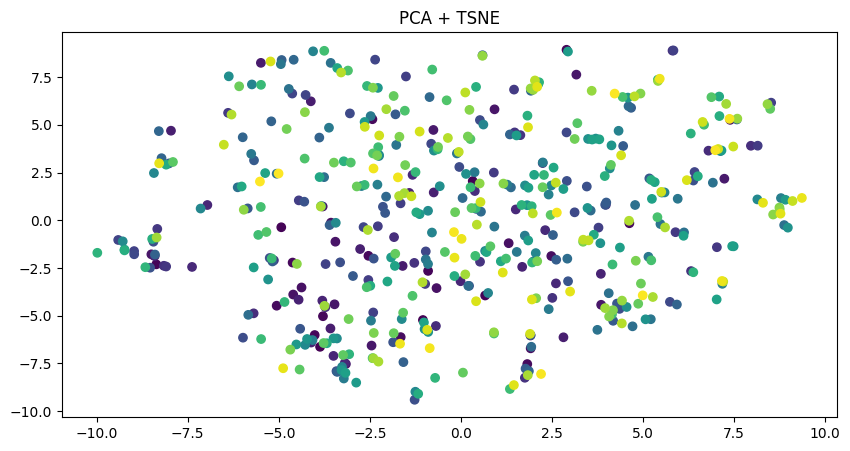

In [138]:
# plot the results
gradient_values = np.linspace(0, 1, len(tsne_results))
plt.figure(figsize=(10, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=gradient_values, cmap='viridis')
plt.title('PCA + TSNE')
plt.show()



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 507 samples in 0.003s...
[t-SNE] Computed neighbors for 507 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 507 / 507
[t-SNE] Mean sigma: 0.157403
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.644501
[t-SNE] KL divergence after 1000 iterations: 1.268823


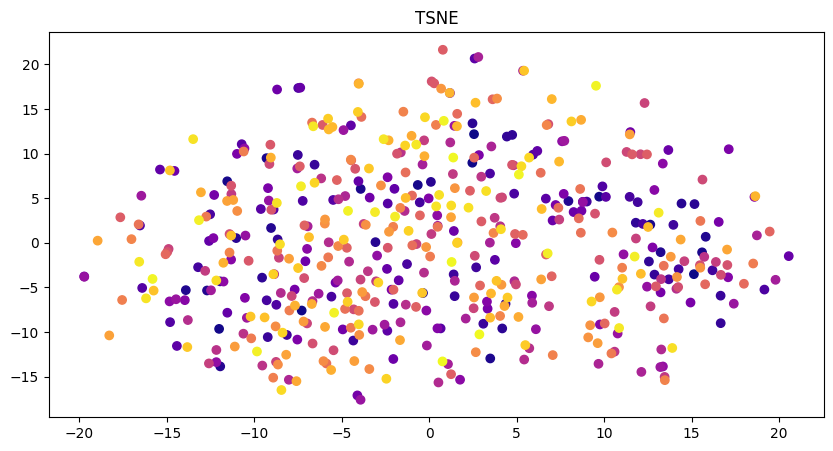

In [139]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=1000)

tsne_results = tsne.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(tsne_results))
plt.figure(figsize=(10, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=gradient_values, cmap='plasma')
plt.title('TSNE')
plt.show()


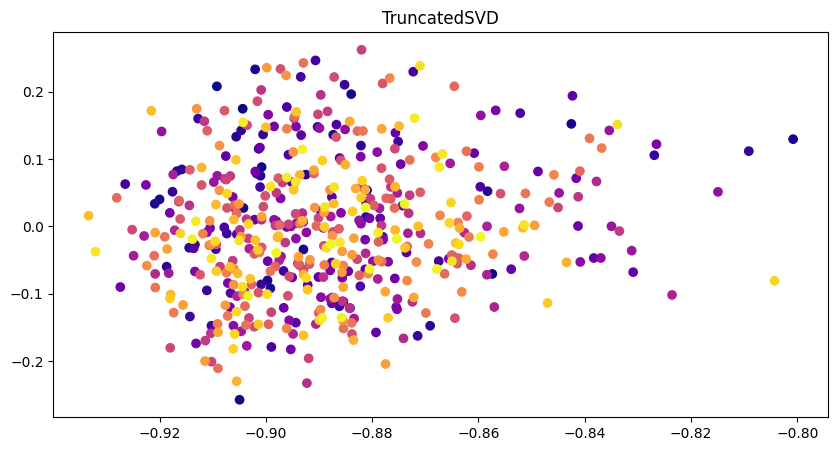

In [140]:
tsvd = TruncatedSVD(n_components=2)
tsvd_results = tsvd.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(tsvd_results))
plt.figure(figsize=(10, 5))
plt.scatter(tsvd_results[:, 0], tsvd_results[:, 1], c=gradient_values, cmap='plasma')
plt.title('TruncatedSVD')
plt.show()


/home/maciej/anaconda3/envs/twitter-posting/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/maciej/anaconda3/envs/twitter-posting/lib/python3.12/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


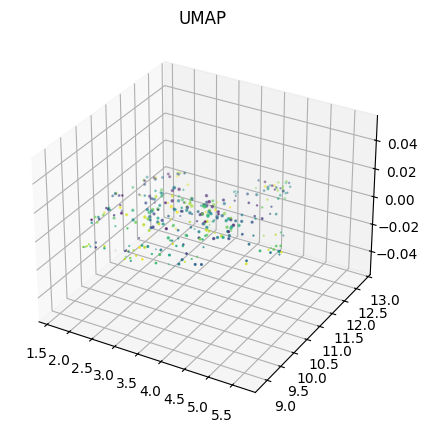

In [141]:
umap = UMAP(n_components=3, n_neighbors=15, min_dist=0.1)
umap_results = umap.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(umap_results))
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(umap_results[:, 0], umap_results[:, 1], umap_results[:, 2], c=gradient_values)
plt.title('UMAP')
plt.show()

/home/maciej/anaconda3/envs/twitter-posting/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


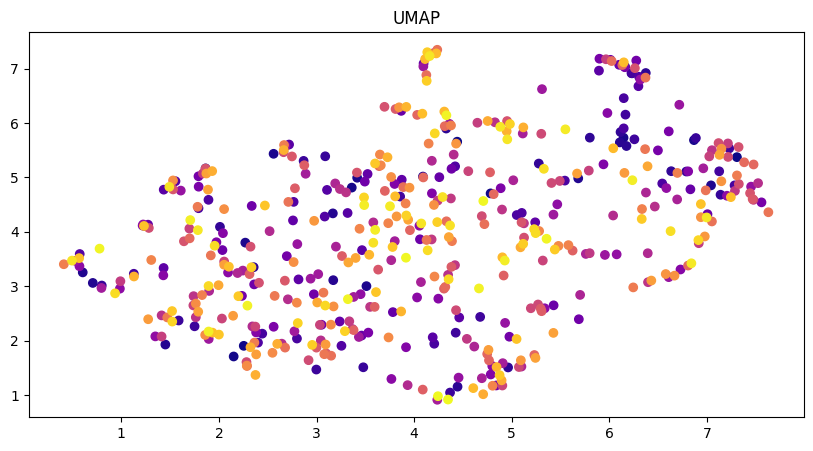

In [142]:
umap = UMAP(n_components=2, n_neighbors=10, min_dist=0.1, metric='cosine')
umap_results = umap.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(umap_results))
plt.figure(figsize=(10, 5))

plt.scatter(umap_results[:, 0], umap_results[:, 1], c=gradient_values, cmap='plasma')
plt.title('UMAP')
plt.show()

/home/maciej/anaconda3/envs/twitter-posting/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


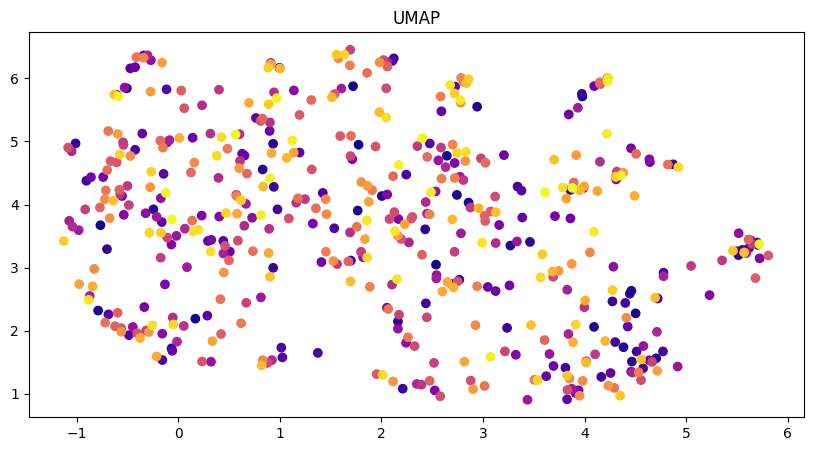

In [150]:
umap = UMAP(n_components=2, min_dist=0.1, n_neighbors=10, metric='cosine')
umap_results = umap.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(umap_results))
plt.figure(figsize=(10, 5))

plt.scatter(umap_results[:, 0], umap_results[:, 1], c=gradient_values, cmap='plasma')
plt.title('UMAP')
plt.show()

# RIV

In [162]:
data = data.sort_values(by='riv', ascending=False).reset_index(drop=True)

embeddings_data = embeddings.embed_documents(data.post_travel)
embeddings_dataframe = pd.DataFrame(embeddings_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 507 samples in 0.002s...
[t-SNE] Computed neighbors for 507 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 507 / 507
[t-SNE] Mean sigma: 0.157384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.630325
[t-SNE] KL divergence after 1000 iterations: 1.295845


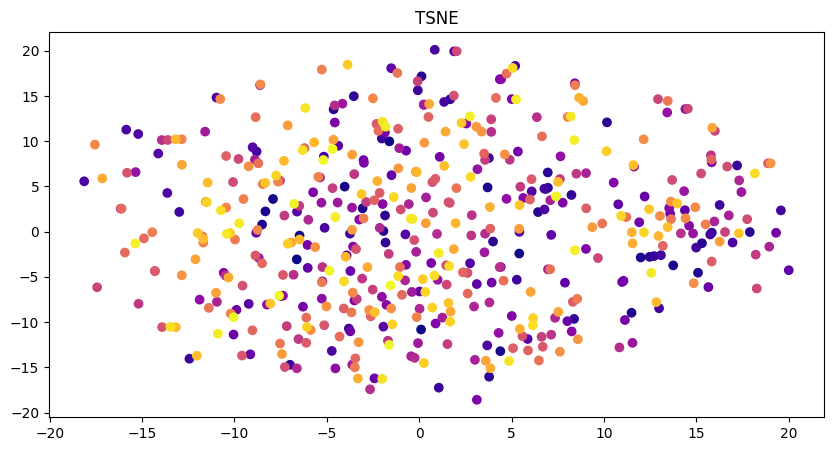

In [146]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=1000)

tsne_results = tsne.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(tsne_results))
plt.figure(figsize=(10, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=gradient_values, cmap='plasma')
plt.title('TSNE')
plt.show()

/home/maciej/anaconda3/envs/twitter-posting/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


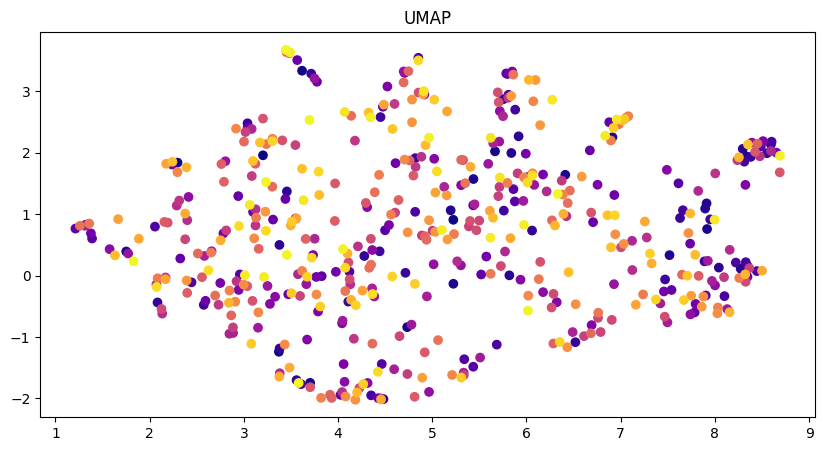

In [163]:
umap = UMAP(n_components=2, min_dist=0.1, n_neighbors=10, metric='cosine')
umap_results = umap.fit_transform(embeddings_dataframe)
# plot the results
gradient_values = np.linspace(0, 1, len(umap_results))
plt.figure(figsize=(10, 5))

plt.scatter(umap_results[:, 0], umap_results[:, 1], c=gradient_values, cmap='plasma')
plt.title('UMAP')
plt.show()

# Linear regression for 0 and 1 narcissism

In [159]:
# divide in half embeddings_dataframe add y = 0 to the first half and y = 1 to the second half
y = np.zeros(len(embeddings_dataframe))
y[len(embeddings_dataframe)//2:] = 1
embeddings_dataframe['y'] = y


In [160]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(embeddings_dataframe.drop(columns='y'), embeddings_dataframe.y, test_size=0.2, random_state=42)

In [161]:
# fit this to linear regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.5784313725490197